# Segment shopping customers:
1. Problem statement: Understand the target customers for the marketing team to plan a strategy.
2. Context: Your boss wants you to identify the most important shopping groups based on income,age & the mall shopping score.He wants the ideal number of groups with a label for each.

In [1]:
# import required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random
import numpy as np
from sklearn.cluster import KMeans
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_mall_customers = pd.read_csv("Downloads/mall_customers.csv")

In [3]:
df_mall_customers.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df_mall_customers.shape

(200, 5)

In [5]:
df_mall_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


## Univariate Analysis

In [6]:
df_mall_customers.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


<Axes: xlabel='Annual Income (k$)', ylabel='Density'>

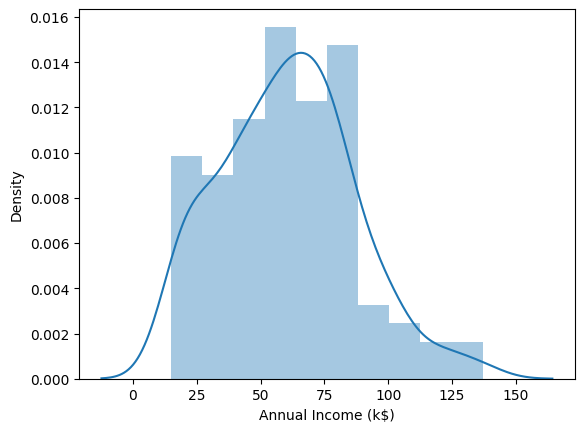

In [7]:
sns.distplot(df_mall_customers['Annual Income (k$)'])

In [8]:
df_mall_customers.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

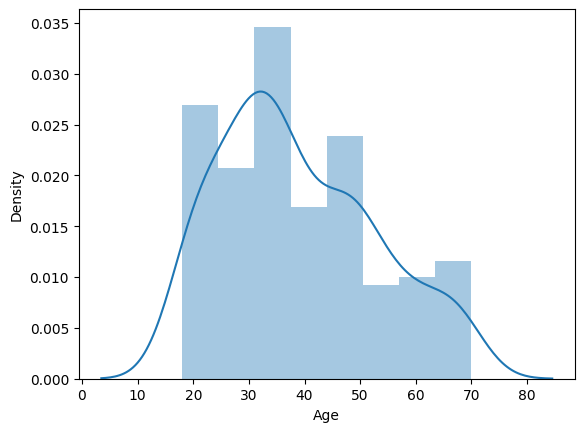

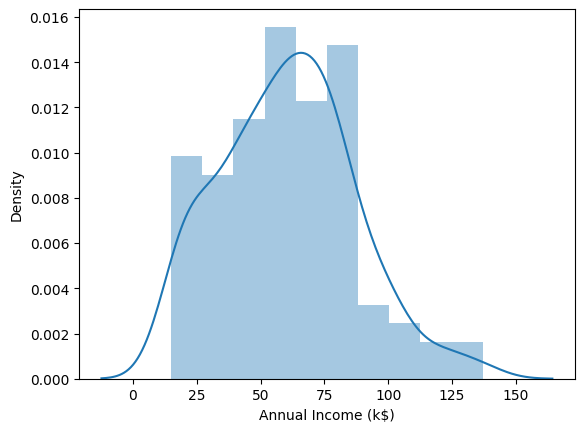

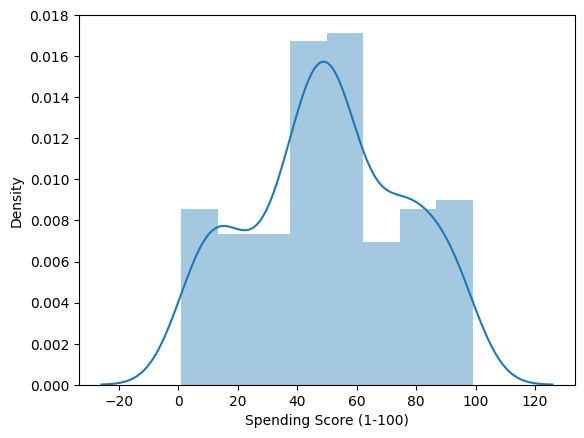

In [9]:
columns = ['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.distplot(df_mall_customers[i])

<Axes: xlabel='Annual Income (k$)', ylabel='Density'>

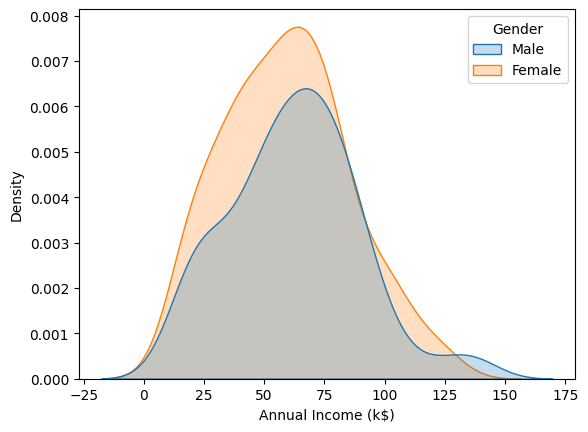

In [10]:
sns.kdeplot(x=df_mall_customers['Annual Income (k$)'],fill = True,hue=df_mall_customers['Gender'])

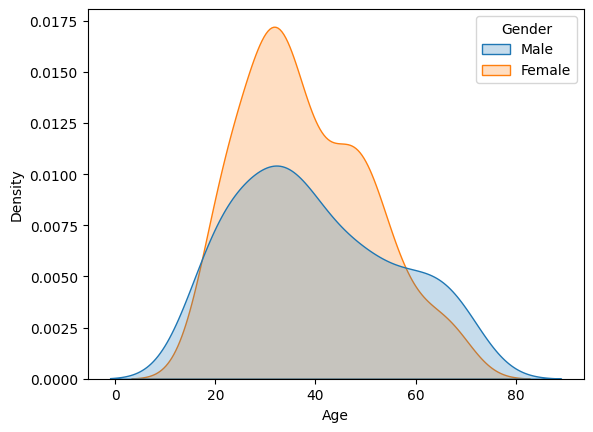

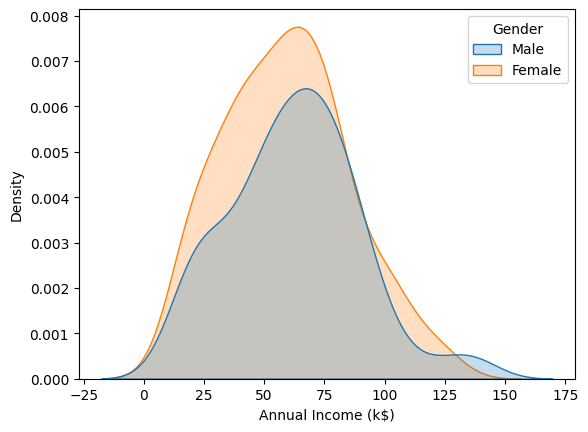

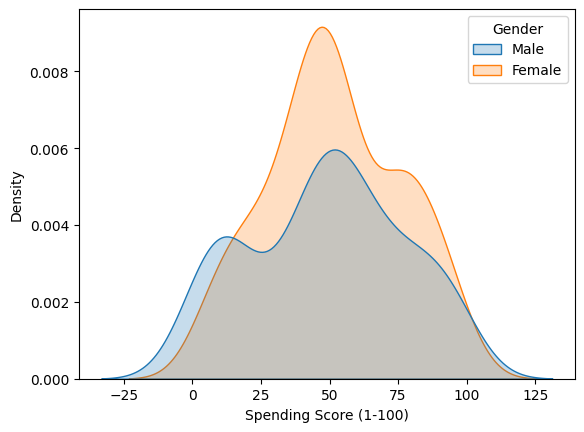

In [11]:
columns = ['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.kdeplot(x=df_mall_customers[i],fill = True,hue=df_mall_customers['Gender'])

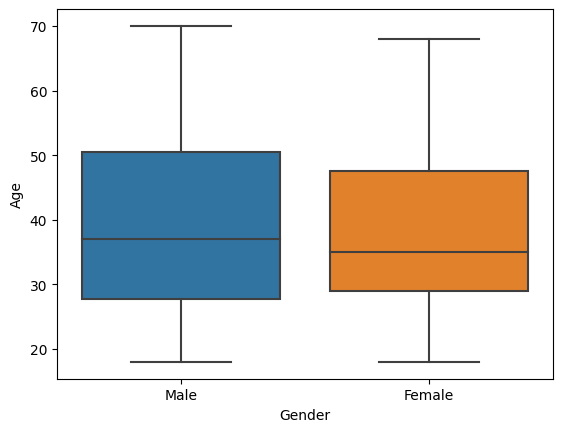

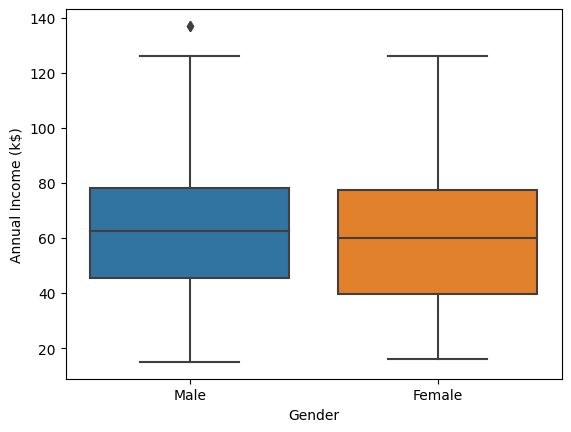

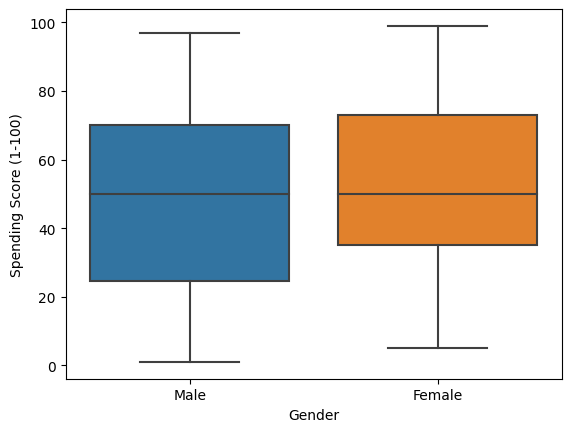

In [12]:
columns = ['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.boxplot(data=df_mall_customers,x='Gender',y=df_mall_customers[i])

In [13]:
df_mall_customers['Gender'].value_counts(normalize=True)

Female    0.56
Male      0.44
Name: Gender, dtype: float64

## Bivariate Analysis

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

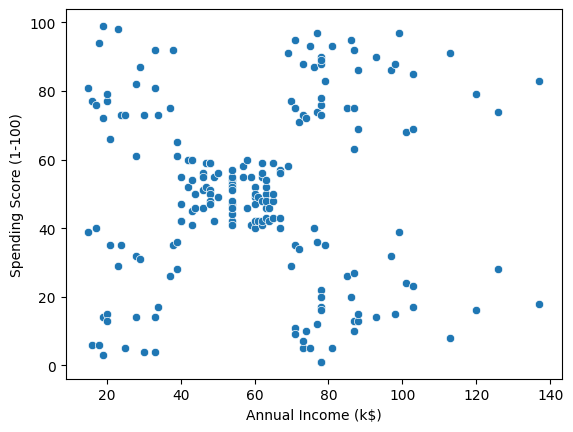

In [14]:
sns.scatterplot(data=df_mall_customers,x='Annual Income (k$)',y='Spending Score (1-100)')

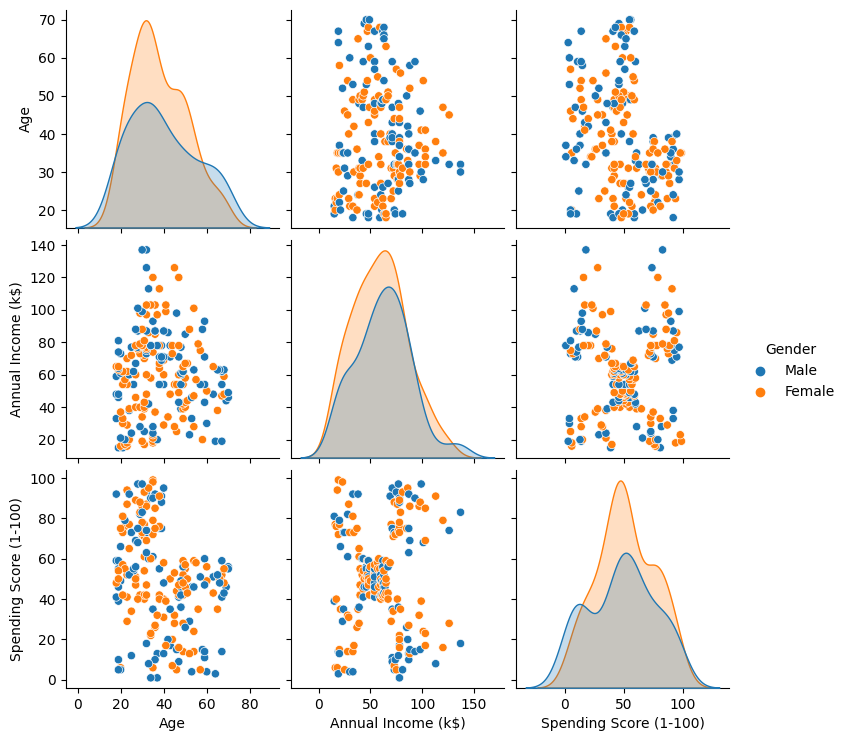

In [15]:
df_mall_customers = df_mall_customers.drop('CustomerID',axis=1)
sns.pairplot(df_mall_customers, hue='Gender')

In [16]:
df_mall_customers.groupby(['Gender'])['Age', 'Annual Income (k$)','Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


In [17]:
df_mall_customers.corr()

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


<Axes: >

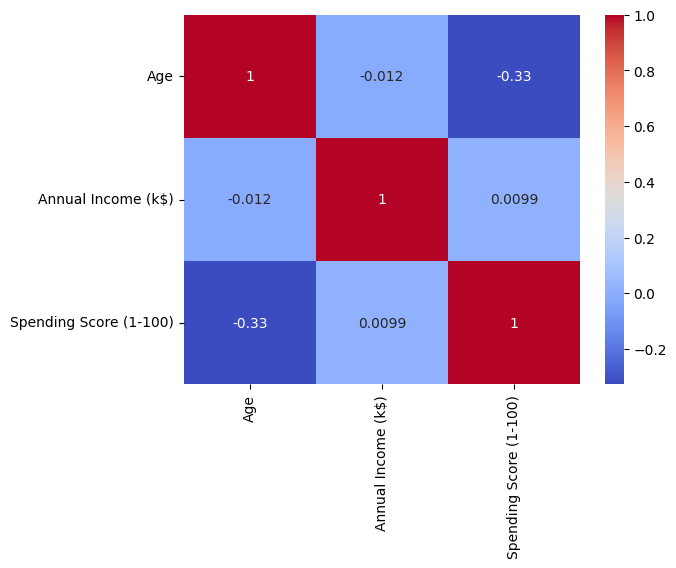

In [18]:
sns.heatmap(df_mall_customers.corr(),annot=True,cmap='coolwarm')

## Clustering - univariate, Bivariate, Multivariate

In [19]:
random.seed(1)
np.random.seed(1)
clustering1 = KMeans(n_clusters=3)

In [20]:
clustering1.fit(df_mall_customers[['Annual Income (k$)']])

KMeans(n_clusters=3)

In [21]:
clustering1.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [22]:
df_mall_customers['Income Cluster'] = clustering1.labels_

In [23]:
df_mall_customers.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster
0,Male,19,15,39,1
1,Male,21,15,81,1
2,Female,20,16,6,1
3,Female,23,16,77,1
4,Female,31,17,40,1


In [24]:
df_mall_customers['Income Cluster'].value_counts()

0    90
1    74
2    36
Name: Income Cluster, dtype: int64

In [25]:
clustering1.inertia_

23517.330930930926

In [26]:
intertia_scores=[]
for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df_mall_customers[['Annual Income (k$)']])
    intertia_scores.append(kmeans.inertia_)

In [27]:
intertia_scores

[137277.28000000003,
 48660.88888888889,
 23517.330930930926,
 13278.112713472487,
 8481.496190476191,
 5050.904761904763,
 3931.988095238096,
 2831.2960317460324,
 2213.6207792207792,
 1758.1453823953823]

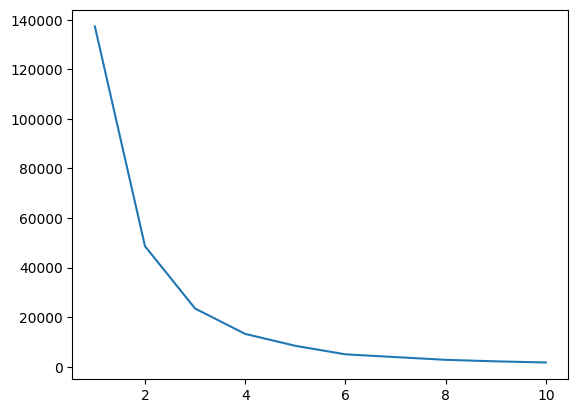

In [28]:
plt.plot(range(1,11),intertia_scores)

In [29]:
df_mall_customers.groupby(['Income Cluster'])['Age', 'Annual Income (k$)','Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Income Cluster,,,
0,38.722222,67.088889,50.000000
1,39.500000,33.486486,50.229730
2,37.833333,99.888889,50.638889


In [30]:
# Bivariate analysis

In [31]:
random.seed(1)
np.random.seed(1)
clustering2 = KMeans(n_clusters = 5)
clustering2.fit(df_mall_customers[['Annual Income (k$)','Spending Score (1-100)']])
df_mall_customers['Spending and Income cluster'] = clustering2.labels_

In [32]:
df_mall_customers.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income cluster
0,Male,19,15,39,1,4
1,Male,21,15,81,1,0
2,Female,20,16,6,1,4
3,Female,23,16,77,1,0
4,Female,31,17,40,1,4


In [33]:
intertia_scores2=[]
for i in range(1,11):
    kmeans2 = KMeans(n_clusters=i)
    kmeans2.fit(df_mall_customers[['Annual Income (k$)','Spending Score (1-100)']])
    intertia_scores2.append(kmeans2.inertia_)

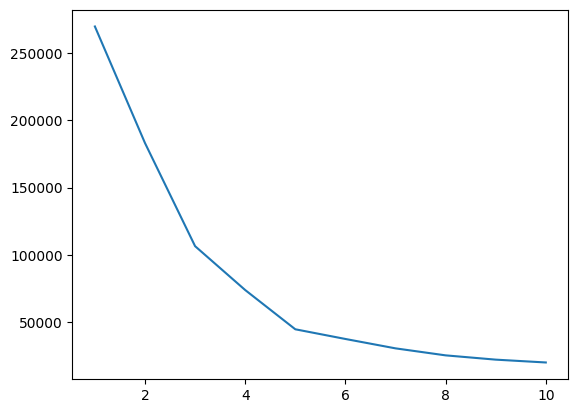

In [34]:
plt.plot(range(1,11),intertia_scores2)

In [35]:
centers = pd.DataFrame(clustering2.cluster_centers_)
centers.columns = ['x','y']
centers

,x,y
0,25.727273,79.363636
1,88.200000,17.114286
2,55.296296,49.518519
3,86.538462,82.128205
4,26.304348,20.913043


<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

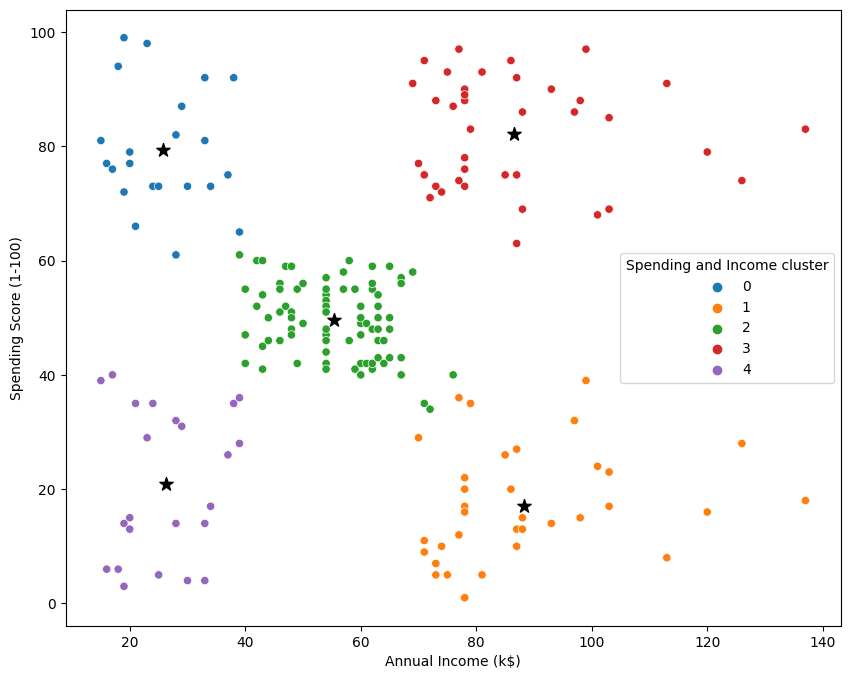

In [36]:
plt.figure(figsize=(10,8))
plt.scatter(x=centers['x'],y=centers['y'],s=100,c='black',marker='*')
sns.scatterplot(data=df_mall_customers,x='Annual Income (k$)',y='Spending Score (1-100)', hue = 'Spending and Income cluster',palette = 'tab10')

In [37]:
df_mall_customers

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income cluster
0,Male,19,15,39,1,4
1,Male,21,15,81,1,0
2,Female,20,16,6,1,4
3,Female,23,16,77,1,0
4,Female,31,17,40,1,4
...,...,...,...,...,...,...
195,Female,35,120,79,2,3
196,Female,45,126,28,2,1
197,Male,32,126,74,2,3
198,Male,32,137,18,2,1


In [38]:
pd.crosstab(df_mall_customers['Spending and Income cluster'],df_mall_customers['Gender'], normalize='index')

Gender,Female,Male
Spending and Income cluster,,
0,0.590909,0.409091
1,0.457143,0.542857
2,0.592593,0.407407
3,0.538462,0.461538
4,0.608696,0.391304


In [39]:
df_mall_customers.groupby(['Spending and Income cluster'])['Age', 'Annual Income (k$)','Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Spending and Income cluster,,,
0,25.272727,25.727273,79.363636
1,41.114286,88.200000,17.114286
2,42.716049,55.296296,49.518519
3,32.692308,86.538462,82.128205
4,45.217391,26.304348,20.913043


In [40]:
#multivariate clustering

In [41]:
random.seed(1)
np.random.seed(1)
from sklearn.preprocessing import StandardScaler

In [42]:
scale = StandardScaler()

In [43]:
df_mall_customers.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income cluster
0,Male,19,15,39,1,4
1,Male,21,15,81,1,0
2,Female,20,16,6,1,4
3,Female,23,16,77,1,0
4,Female,31,17,40,1,4


In [44]:
dff_mall_customers = pd.get_dummies(df_mall_customers, drop_first = True)
dff_mall_customers.head()

,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income cluster,Gender_Male
0,19,15,39,1,4,1
1,21,15,81,1,0,1
2,20,16,6,1,4,0
3,23,16,77,1,0,0
4,31,17,40,1,4,0


In [45]:
dff_mall_customers.columns

Index(['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Income Cluster',
       'Spending and Income cluster', 'Gender_Male'],
      dtype='object')

In [46]:
dff_mall_customers = dff_mall_customers[[ 'Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender_Male']]
dff_mall_customers

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0
...,...,...,...,...
195,35,120,79,0
196,45,126,28,0
197,32,126,74,1
198,32,137,18,1


In [47]:
dff_mall_customers = scale.fit_transform(dff_mall_customers)
dff_mall_customers

array([[-1.42456879, -1.73899919, -0.43480148,  1.12815215],
       [-1.28103541, -1.73899919,  1.19570407,  1.12815215],
       [-1.3528021 , -1.70082976, -1.71591298, -0.88640526],
       [-1.13750203, -1.70082976,  1.04041783, -0.88640526],
       [-0.56336851, -1.66266033, -0.39597992, -0.88640526],
       [-1.20926872, -1.66266033,  1.00159627, -0.88640526],
       [-0.27630176, -1.62449091, -1.71591298, -0.88640526],
       [-1.13750203, -1.62449091,  1.70038436, -0.88640526],
       [ 1.80493225, -1.58632148, -1.83237767,  1.12815215],
       [-0.6351352 , -1.58632148,  0.84631002, -0.88640526],
       [ 2.02023231, -1.58632148, -1.4053405 ,  1.12815215],
       [-0.27630176, -1.58632148,  1.89449216, -0.88640526],
       [ 1.37433211, -1.54815205, -1.36651894, -0.88640526],
       [-1.06573534, -1.54815205,  1.04041783, -0.88640526],
       [-0.13276838, -1.54815205, -1.44416206,  1.12815215],
       [-1.20926872, -1.54815205,  1.11806095,  1.12815215],
       [-0.27630176, -1.

In [48]:
dff_mall_customers = pd.DataFrame(scale.fit_transform(dff_mall_customers))

In [49]:
dff_mall_customers

,0,1,2,3
0,-1.424569,-1.738999,-0.434801,1.128152
1,-1.281035,-1.738999,1.195704,1.128152
2,-1.352802,-1.700830,-1.715913,-0.886405
3,-1.137502,-1.700830,1.040418,-0.886405
4,-0.563369,-1.662660,-0.395980,-0.886405
...,...,...,...,...
195,-0.276302,2.268791,1.118061,-0.886405
196,0.441365,2.497807,-0.861839,-0.886405
197,-0.491602,2.497807,0.923953,1.128152
198,-0.491602,2.917671,-1.250054,1.128152


In [50]:
dff_mall_customers.columns = [ 'Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender_Male']
dff_mall_customers

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,-1.424569,-1.738999,-0.434801,1.128152
1,-1.281035,-1.738999,1.195704,1.128152
2,-1.352802,-1.700830,-1.715913,-0.886405
3,-1.137502,-1.700830,1.040418,-0.886405
4,-0.563369,-1.662660,-0.395980,-0.886405
...,...,...,...,...
195,-0.276302,2.268791,1.118061,-0.886405
196,0.441365,2.497807,-0.861839,-0.886405
197,-0.491602,2.497807,0.923953,1.128152
198,-0.491602,2.917671,-1.250054,1.128152


In [51]:
random.seed(4)
np.random.seed(4)
clustering3 = KMeans(n_clusters = 4)
clustering3.fit(dff_mall_customers[[ 'Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender_Male']])
dff_mall_customers['Age,Gender,Spending and Income cluster'] = clustering3.labels_

In [52]:
intertia_scores3=[]
for i in range(1,11):
    kmeans3 = KMeans(n_clusters=i)
    kmeans3.fit(dff_mall_customers)
    intertia_scores3.append(kmeans3.inertia_)

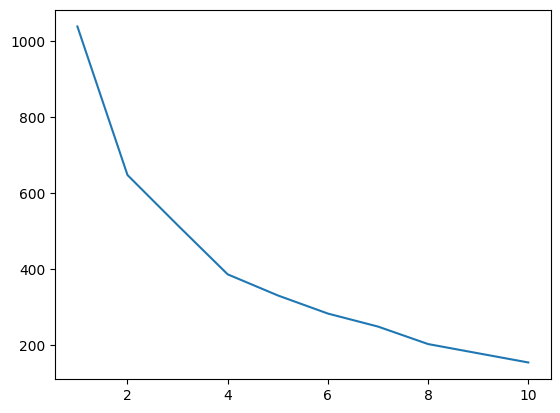

In [53]:
plt.plot(range(1,11),intertia_scores3)

In [54]:
dff_mall_customers

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male,"Age,Gender,Spending and Income cluster"
0,-1.424569,-1.738999,-0.434801,1.128152,3
1,-1.281035,-1.738999,1.195704,1.128152,3
2,-1.352802,-1.700830,-1.715913,-0.886405,1
3,-1.137502,-1.700830,1.040418,-0.886405,0
4,-0.563369,-1.662660,-0.395980,-0.886405,1
...,...,...,...,...,...
195,-0.276302,2.268791,1.118061,-0.886405,0
196,0.441365,2.497807,-0.861839,-0.886405,1
197,-0.491602,2.497807,0.923953,1.128152,3
198,-0.491602,2.917671,-1.250054,1.128152,2


In [55]:
centers = pd.DataFrame(clustering3.cluster_centers_)
centers.columns = ['w','x','y','z']
centers

,w,x,y,z
0,-0.750475,-0.005017,0.697956,-0.886405
1,0.642568,-0.094987,-0.594940,-0.886405
2,0.759830,0.070868,-0.814929,1.128152
3,-0.760727,0.054964,0.833693,1.128152


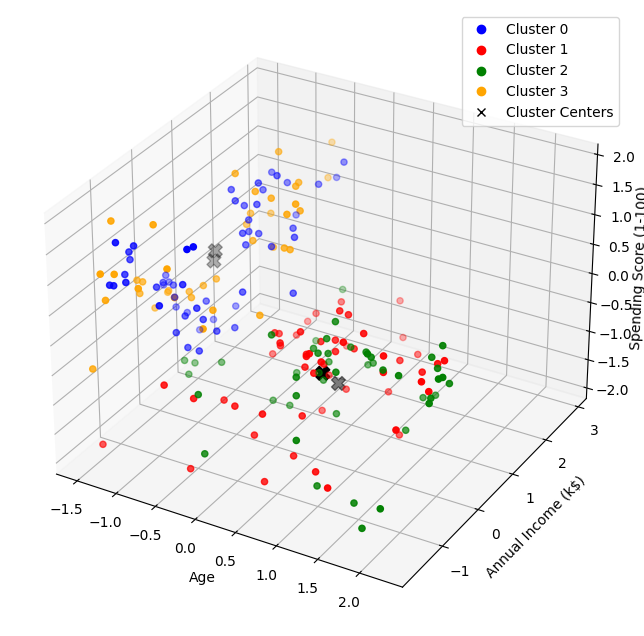

In [56]:
from mpl_toolkits.mplot3d import Axes3D

dff_mall_customers['Cluster'] = dff_mall_customers['Age,Gender,Spending and Income cluster']

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter1 = ax.scatter(dff_mall_customers.Age[dff_mall_customers.Cluster==0], dff_mall_customers['Annual Income (k$)'][dff_mall_customers.Cluster==0], dff_mall_customers['Spending Score (1-100)'][dff_mall_customers.Cluster==0], c='blue', cmap='tab10')
scatter2 = ax.scatter(dff_mall_customers.Age[dff_mall_customers.Cluster==1], dff_mall_customers['Annual Income (k$)'][dff_mall_customers.Cluster==1], dff_mall_customers['Spending Score (1-100)'][dff_mall_customers.Cluster==1], c='red', cmap='tab10')
scatter3 = ax.scatter(dff_mall_customers.Age[dff_mall_customers.Cluster==2], dff_mall_customers['Annual Income (k$)'][dff_mall_customers.Cluster==2], dff_mall_customers['Spending Score (1-100)'][dff_mall_customers.Cluster==2], c='green', cmap='tab10')
scatter4 = ax.scatter(dff_mall_customers.Age[dff_mall_customers.Cluster==3], dff_mall_customers['Annual Income (k$)'][dff_mall_customers.Cluster==3], dff_mall_customers['Spending Score (1-100)'][dff_mall_customers.Cluster==3], c='orange', cmap='tab10')

# Plot cluster centers
ax.scatter(centers['w'], centers['x'], centers['y'], c='black', marker='X', s=100)

ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)', labelpad=0, rotation=90)

# Create custom legend elements
legend_elements = [
    plt.Line2D([0], [0], marker='o', color='blue', label='Cluster 0', linestyle='None'),
    plt.Line2D([0], [0], marker='o', color='red', label='Cluster 1', linestyle='None'),
    plt.Line2D([0], [0], marker='o', color='green', label='Cluster 2', linestyle='None'),
    plt.Line2D([0], [0], marker='o', color='orange', label='Cluster 3', linestyle='None'),
    plt.Line2D([0], [0], marker='x', color='black', label='Cluster Centers', linestyle='None')
]

# Add legend to the plot
ax.legend(handles=legend_elements)


plt.show()

In [57]:
pd.crosstab(dff_mall_customers['Age,Gender,Spending and Income cluster'],dff_mall_customers['Gender_Male'], normalize='index')

Gender_Male,-0.886405,1.128152
"Age,Gender,Spending and Income cluster",,
0,1.0,0.0
1,1.0,0.0
2,0.0,1.0
3,0.0,1.0


In [58]:
dff_mall_customers.groupby(['Age,Gender,Spending and Income cluster'])['Age', 'Annual Income (k$)','Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
"Age,Gender,Spending and Income cluster",,,
0,-0.750475,-0.005017,0.697956
1,0.642568,-0.094987,-0.594940
2,0.759830,0.070868,-0.814929
3,-0.760727,0.054964,0.833693


# Takeaways from the data:
1. In the Univariate Cluster Analysis we see that the spending score is almost similar in all three clusters with cluster 2 having the highest score and that inline with our correlation analysis we see that as age increases the annual income reduces(a negative correlation between age and annual income).
2. In the Bivariate Cluster Analysis we see that our target cluster is cluster 3 because it has high annual income and a high spending score). 
3. In the Multivariate Cluster Analysis we see that clusters 0 and 1 consists of only females while clusters 2 and 3 consists of only males.Cluster 1 consists of young females with low annual income but low spending score in comparison to cluster 2 which consists of older males with high annual income but low spending score.We can observe from clusters 1 and 2 that even though females earn less they spend more than the males. Clusters 0 and 3 consists of young females and males about the same age respectively where the males have a higher annual income than the females but both have a good spending score. While using multivariate cluster analysis the target clusters should be clusters 0 and 3.